In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import sklearn.metrics as met
data = np.load("taxi_all.npz")

def metrics(lables, pred, prnt = False):
    tn, fp, fn, tp = met.confusion_matrix(labels, pred).ravel()
    ppv = tp /(tp + fp)
    precall = tp /(tp + fn)
    
    npv = tn /(tn + fn)
    nrecall = tn /(tn + fp)
    
    acc = (tp + tn) / (tp+tn+fp+fn)
    
    if prnt:
        print("Positive Precision:", ppv)
        print("Positive Recall   :", precall)
        print("Negative Precision:", npv)
        print("Negative Recall   :", nrecall)
        print("Accuracy          :", acc)
    return ppv, precall, npv, nrecall, acc

# Anamolies from the paper
time_stamps = [np.datetime64(i) for i in data["dates"]]

independence_day = (time_stamps.index(np.datetime64('2014-07-04 00:00:00')),
                    time_stamps.index(np.datetime64('2014-07-07 00:00:00')))
labor_day        = (time_stamps.index(np.datetime64('2014-09-01 00:00:00')),
                    time_stamps.index(np.datetime64('2014-09-02 00:00:00')))
labor_day_parade = (time_stamps.index(np.datetime64('2014-09-06 00:00:00')),
                    time_stamps.index(np.datetime64('2014-09-07 00:00:00')))
NYC_marathon     = (time_stamps.index(np.datetime64('2014-11-02 00:00:00')),
                    time_stamps.index(np.datetime64('2014-11-03 00:00:00')))
thanksgiving     = (time_stamps.index(np.datetime64('2014-11-27 00:00:00')),
                    time_stamps.index(np.datetime64('2014-11-28 00:00:00')))
christmas        = (time_stamps.index(np.datetime64('2014-12-25 00:00:00')),
                    time_stamps.index(np.datetime64('2014-12-26 00:00:00')))
new_year         = (time_stamps.index(np.datetime64('2015-01-01 00:00:00')),
                    time_stamps.index(np.datetime64('2015-01-02 00:00:00')))
blizzard         = (time_stamps.index(np.datetime64('2015-01-26 00:00:00')),
                    time_stamps.index(np.datetime64('2015-01-28 00:00:00')))
anamolies = [independence_day, labor_day, labor_day_parade, NYC_marathon, thanksgiving, christmas, new_year, blizzard]

labels = np.ones(len(data["passengers"]))

for i,j in anamolies:
    labels[i:j] = 0

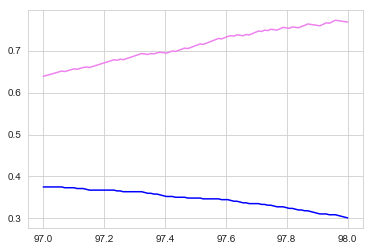

In [17]:
## 1000 sample size 
labels = np.ones(len(data["passengers"]))
for i,j in anamolies[:]:
    labels[i:j] = 0
ppv = []
precall = []
npv = []
nrecall = []
acc = []
r = np.linspace(97,98, 100)
for i in r:
    codisp_score = np.load("./FINALALAcodisp_trees_200.npy").mean(axis=1)
    mask = np.percentile(codisp_score, i)
    codisp_score[codisp_score <= mask] = 1
    codisp_score[codisp_score > mask] = 0
    p, pr, n, nr, ac = metrics(labels, codisp_score)
    ppv.append(p)
    precall.append(pr)
    npv.append(n)
    nrecall.append(nr)
    acc.append(ac)

#plt.plot(r, ppv, 'g')
plt.plot(r, npv, 'violet')
plt.plot(r, nrecall, 'b')
#plt.plot(r, precall, "r")

In [18]:
codisp_score = np.load("./FINALALAcodisp_trees_200.npy").mean(axis=1)
mask = np.percentile(codisp_score, 97.4)
codisp_score[codisp_score <= mask] = 1
codisp_score[codisp_score > mask] = 0
p, pr, n, nr, ac = metrics(labels, codisp_score, True)

Positive Precision: 0.9660730275594468
Positive Recall   : 0.9916258169934641
Negative Precision: 0.6951672862453532
Negative Recall   : 0.3541666666666667
Accuracy          : 0.9590116279069767


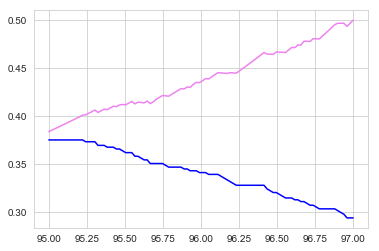

In [24]:
## 1000 sample size 
labels = np.ones(len(data["passengers"]))
for i,j in anamolies[:]:
    labels[i:j] = 0
ppv = []
precall = []
npv = []
nrecall = []
acc = []
r = np.linspace(95,97, 100)
for i in r:
    codisp_score = np.load("./codisp_trees_512.npy").mean(axis=1)
    mask = np.percentile(codisp_score, i)
    codisp_score[codisp_score <= mask] = 1
    codisp_score[codisp_score > mask] = 0
    p, pr, n, nr, ac = metrics(labels, codisp_score)
    ppv.append(p)
    precall.append(pr)
    npv.append(n)
    nrecall.append(nr)
    acc.append(ac)

#plt.plot(r, ppv, 'g')
plt.plot(r, npv, 'violet')
plt.plot(r, nrecall, 'b')
#plt.plot(r, precall, "r")

In [30]:
codisp_score = np.load("./codisp_trees_512.npy").mean(axis=1)
mask = np.percentile(codisp_score, 96.25)
codisp_score[codisp_score <= mask] = 1
codisp_score[codisp_score > mask] = 0
p, pr, n, nr, ac = metrics(labels, codisp_score, True)

Positive Precision: 0.9642605456558945
Positive Recall   : 0.9781454248366013
Negative Precision: 0.4470284237726098
Negative Recall   : 0.32765151515151514
Accuracy          : 0.9448643410852713


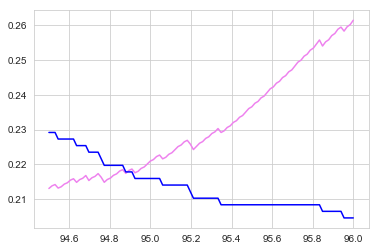

In [29]:
## 1000 sample size 
labels = np.ones(len(data["passengers"]))
for i,j in anamolies[:]:
    labels[i:j] = 0
ppv = []
precall = []
npv = []
nrecall = []
acc = []
r = np.linspace(94.5,96, 100)
for i in r:
    codisp_score = np.load("./codisp_trees_256.npy").mean(axis=1)
    mask = np.percentile(codisp_score, i)
    codisp_score[codisp_score <= mask] = 1
    codisp_score[codisp_score > mask] = 0
    p, pr, n, nr, ac = metrics(labels, codisp_score)
    ppv.append(p)
    precall.append(pr)
    npv.append(n)
    nrecall.append(nr)
    acc.append(ac)

#plt.plot(r, ppv, 'g')
plt.plot(r, npv, 'violet')
plt.plot(r, nrecall, 'b')
#plt.plot(r, precall, "r")

In [31]:
codisp_score = np.load("./codisp_trees_256.npy").mean(axis=1)
mask = np.percentile(codisp_score, 95.8)
codisp_score[codisp_score <= mask] = 1
codisp_score[codisp_score > mask] = 0
p, pr, n, nr, ac = metrics(labels, codisp_score, True)

Positive Precision: 0.9577179850293344
Positive Recall   : 0.9669117647058824
Negative Precision: 0.2534562211981567
Negative Recall   : 0.20833333333333334
Accuracy          : 0.9281007751937984


In [60]:
from sklearn.ensemble import IsolationForest
import copy
D = np.zeros((len(data["passengers"])-48, 48))
for i in range(48, len(data["passengers"])):
    D[i-48,:] = data["passengers"][i-48:i]
## 1000 sample size 
labels = np.ones(len(data["passengers"]))
for i,j in anamolies[:]:
    labels[i:j] = 0
labels = copy.deepcopy(labels[48:])
ppv = []
precall = []
npv = []
nrecall = []
acc = []
r = np.linspace(0,0.1, 10)
IF = IsolationForest(n_estimators = 200,
                    max_samples  = 256,
                    contamination= 0.05,
                    behaviour='new',
                    random_state=0)
IF.fit(D)
if_pred = IF.fit_predict(D)
if_pred[if_pred < 0] = 0
metrics(labels, if_pred, True)

Positive Precision: 0.9576757532281205
Positive Recall   : 0.959051724137931
Negative Precision: 0.2237354085603113
Negative Recall   : 0.2178030303030303
Accuracy          : 0.9209501557632399


(0.9576757532281205,
 0.959051724137931,
 0.2237354085603113,
 0.2178030303030303,
 0.9209501557632399)

In [56]:
if_pred

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
from sklearn.ensemble import IsolationForest
import copy
D = np.zeros((len(data["passengers"])-48, 48))
for i in range(48, len(data["passengers"])):
    D[i-48,:] = data["passengers"][i-48:i]
## 1000 sample size 
labels = np.ones(len(data["passengers"]))
for i,j in anamolies[:]:
    labels[i:j] = 0
labels = copy.deepcopy(labels[48:])
ppv = []
precall = []
npv = []
nrecall = []
acc = []
r = np.linspace(0,0.1, 10)
IF = IsolationForest(n_estimators = 200,
                    max_samples  = 512,
                    contamination= 0.05,
                    behaviour='new',
                    random_state=0)
IF.fit(D)
if_pred = IF.fit_predict(D)
if_pred[if_pred < 0] = 0
metrics(labels, if_pred, True)

Positive Precision: 0.957983193277311
Positive Recall   : 0.9593596059113301
Negative Precision: 0.22957198443579765
Negative Recall   : 0.22348484848484848
Accuracy          : 0.9215342679127726


(0.957983193277311,
 0.9593596059113301,
 0.22957198443579765,
 0.22348484848484848,
 0.9215342679127726)

In [62]:
from sklearn.ensemble import IsolationForest
import copy
D = np.zeros((len(data["passengers"])-48, 48))
for i in range(48, len(data["passengers"])):
    D[i-48,:] = data["passengers"][i-48:i]
## 1000 sample size 
labels = np.ones(len(data["passengers"]))
for i,j in anamolies[:]:
    labels[i:j] = 0
labels = copy.deepcopy(labels[48:])
ppv = []
precall = []
npv = []
nrecall = []
acc = []
r = np.linspace(0,0.1, 10)
IF = IsolationForest(n_estimators = 200,
                    max_samples  = 1000,
                    contamination= 0.05,
                    behaviour='new',
                    random_state=0)
IF.fit(D)
if_pred = IF.fit_predict(D)
if_pred[if_pred < 0] = 0
metrics(labels, if_pred, True)

Positive Precision: 0.9577782332445173
Positive Recall   : 0.9591543513957307
Negative Precision: 0.22568093385214008
Negative Recall   : 0.2196969696969697
Accuracy          : 0.9211448598130841


(0.9577782332445173,
 0.9591543513957307,
 0.22568093385214008,
 0.2196969696969697,
 0.9211448598130841)